In [1]:
#hide
# ! [ -e /content ] && pip install -Uqq fastbook
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.9 MB/s eta 0:00:00
Mounted at /content/gdrive


## Gradient Descent Workflow

The below seven steps are the key to the training of all deep learning models.

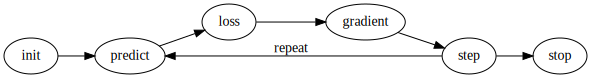

In [12]:

#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')



1.   Initialize: We initialize the parameters to random values.
2. Predict: Using current model & parameters, make predictions of the test data.
3. Loss: (testing the effectiveness of any current weight assignment in terms of actual performance). We need some function that will return a number that is small if the performance of the model is good.
4. Gradient: The magic of calculus allows us to directly figure out in which direction, and by roughly how much, to change each weight, without having to try all these small changes. The way to do this is by calculating gradients.
5. Step: Perform performance optimization, by adjusting the weights in the direction and magnitude as determined from the gradients. Keep going back to predict step until stop condition is met.
6. Stop: We decide how many epochs to train the model for. If our model is small, we would keep training until the accuracy of the model started getting worse, or we ran out of time.

## Gradient Descent Intuition

We can gain intuition by applying the above steps to a simple problem.

- Let's pretend a simple quadratic $x^2$ as our loss function, and x is a weight parameter of the function.
- Lets pick a random value for our weight parameter,say -1.5 and calculate the loss. (we are already at step 3 of the above outline)

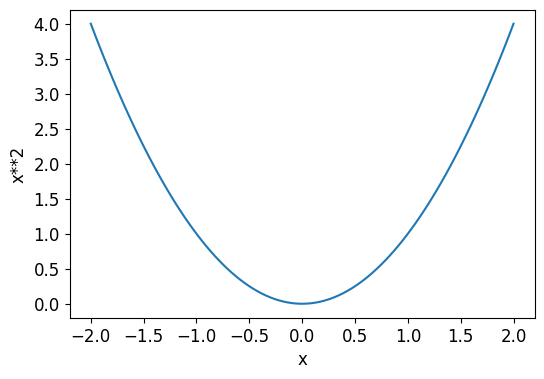

In [20]:
def f(x): return x**2
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

- To perform step adjustment (step5) of the weight parameter, we need to know the gradients.
- To get gradients (step4), we can simply calculate slope at that point -1.5.
![svg](grad_illustration.svg)
- We can change our weight by a little in the direction of the slope, calculate our loss and adjustment again, and repeat this a few times. Eventually, we will get to the lowest point on our curve:
![svg](chapter2_perfect.svg)
- By always taking a step in the direction of the steepest downward slope, you should eventually arrive at your destination. We use the magnitude of the gradient (i.e., the steepness of the slope) to tell us how big a step to take; specifically, we multiply the gradient by a number we choose called the learning rate to decide on the step size. We then iterate until we have reached the lowest point, which will be our lowest loss point, then we can stop.

## Calculating Gradients

- Step4 is the magical step to calculate gradients.
- The gradients will tell us how much we have to change each weight to make our model better.
- From calculus, we know the derivative of a function tells you how much a change in its parameters will change its result.
- For any function, such as the quadratic function we saw in the previous section, we can calculate its derivative. The derivative is another function. It calculates the change, rather than the value. For instance, the derivative of the quadratic function at the value 3 tells us how rapidly the function changes at the value 3.
- Gradient is defined as rise/run, that is, the change in the value of the function, divided by the change in the value of the parameter. When we know how our function will change, then we know what we need to do to make it smaller. This is the key to machine learning: having a way to change the parameters of a function to make it smaller. Calculus provides us with a computational shortcut, the derivative, which lets us directly calculate the gradients of our functions.




PyTorch is able to automatically compute the derivative of nearly any function.
Let's pick a tensor value which we want gradients at:



In [3]:
xt = tensor(3.).requires_grad_()

The special method `requires_grad_()` is to tell PyTorch that we want to calculate gradients with respect to that variable at that value. It is essentially tagging the variable, so PyTorch will remember to keep track of how to compute gradients of the other, direct calculations on it that you will ask for.



Now we calculate our function with that value. Notice how PyTorch prints not just the value calculated, but also a note that it has a gradient function it'll be using to calculate our gradients when needed:

In [4]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

Finally, we tell PyTorch to calculate the gradients for us:

In [5]:
yt.backward()

The "backward" here refers to backpropagation, which is the name given to the process of calculating the derivative of each layer. This is called the "backward pass" of the network, as opposed to the "forward pass," which is where the activations are calculated. Life would probably be easier if backward was just called calculate_grad, but deep learning folks really do like to add jargon everywhere they can!



We can now view the gradients by checking the grad attribute of our tensor:

In [6]:
xt.grad

tensor(6.)

The derivative of x**2 is 2*x, and we have x=3, so the gradients should be 2*3=6, which is what PyTorch calculated for us!



Here is a summary of the all the steps required to calculate Gradients in Pytorch.

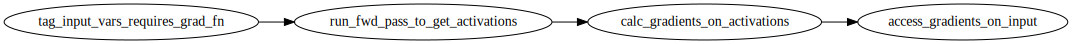

In [17]:
gv('''
tag_input_vars_requires_grad_fn->run_fwd_pass_to_get_activations->calc_gradients_on_activations->access_gradients_on_input
''')

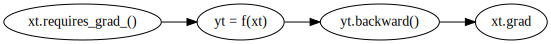

In [19]:
gv('''
"xt.requires_grad_()"->"yt = f(xt)"->"yt.backward()"->"xt.grad"
''')

The gradients only tell us the slope of our function, they don't actually tell us exactly how far to adjust the parameters. But it gives us some idea of how far; if the slope is very large, then that may suggest that we have more adjustments to do, whereas if the slope is very small, that may suggest that we are close to the optimal value.

## Loss Functions
### L1 Norm (mean absolute difference)
The mean of the absolute value of differences.

Mathematically, the formula for the mean absolute difference (MAD) is given as:

$$ MAD = Σ |xᵢ - μ| / N$$

Where:
- Σ represents the summation symbol, indicating that you sum up the values for all data points.
- xᵢ represents each individual data point.
- μ is the mean of the data.
- N is the total number of data points.

It is a useful measure of dispersion because it tells you, on average, how far each data point is from the mean.
A smaller MAD indicates that the data points are closely clustered around the mean, while a larger MAD suggests greater variability or spread in the data.


### L2 Norm (root mean squared error (RMSE) )
The mean of the square of differences (which makes everything positive) and then take the square root (which undoes the squaring).

Mathematically, the formula for RMSE is given as:

$$ RMSE = sqrt[Σ(ŷᵢ - yᵢ)² / N]$$

Where:
- Σ represents the summation symbol, indicating that you sum up the values for all data points.
- ŷᵢ represents the predicted value for the i-th data point.
- yᵢ represents the actual (observed) value for the i-th data point.
- N is the total number of data points.

Squaring the errors penalizes larger errors more heavily, giving more importance to larger deviations between predicted and actual values.

Taking the square root of the mean squared errors scales the metric back to the original units and provides a measure of the average error.

RMSE gives higher weight to outliers compared to the Mean Absolute Error (MAE), making it sensitive to extreme errors.

Lower RMSE values indicate better model performance, as they suggest smaller prediction errors.

## Stepping With a Learning Rate
- Deciding how to change our parameters based on the values of the gradients is an important part of the deep learning process.
- Nearly all approaches start with the basic idea of multiplying the gradient by some small number, called the learning rate (LR). The learning rate is often a number between 0.001 and 0.1, although it could be anything. Often, people select a learning rate just by trying a few, and finding which results in the best model after training

**Why need learning rate?**
When updating model parameters using gradients, multiplying the gradient by the learning rate scales down the step size. If we directly update the parameters without stepping down the gradients with learning rate, the optimization algorithm may oscillate or diverge, making it difficult to find a good solution.

Once you've picked a learning rate, you can adjust your parameters using this simple function:

$$w -= gradient(w) * lr$$

This is known as stepping your parameters, using an optimizer step. The negative sign allows us to adjust the parameter in the direction of the slope by increasing the parameter when the slope is negative and decreasing the parameter when the slope is positive.
![png](slope_illustration.png)
We want to adjust our parameters in the direction of the slope because our goal in deep learning is to minimize the loss.

**Impacts of low & high learning rate:**

If you pick a learning rate that's too low, it can mean having to do a lot of steps. Optimization algorithm will take too long to converge.
![svg](low_learning_rate.svg)
If the learning rate is too high, it may also "bounce" around, rather than actually diverging;
![svg](high_learning_rate.svg)

## SGD Example: Quadratic Function
Now that we have covered the SGD basics, lets run it on the quadratic function as an example. We will see how gradients can help determine the minimum.

Lets build a quadratic function with 20 timesteps.

In [22]:
time = torch.arange(0,20).float();
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

Lets add a bit of random noise, since measuring things manually isn't precise.

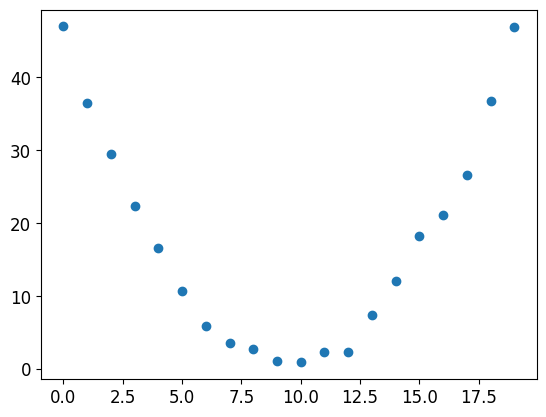

In [33]:
# speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
speed = torch.randn(20)+ 0.50*(time-9.5)**2 + 1
plt.scatter(time,speed);

The above is our synthetic data. i.e., our x input and y output mappings.

Now lets select a model to start with. Looking at this data, we think a quadratic function would be the best fit. We can't consider every possible function, so let's use a guess that it will be quadratic; i.e., a function of the form `a*(time**2)+(b*time)+c`. Lets define a model function for this:

In [34]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

By definining this model, we've restricted the problem of finding the best imaginable function that fits the data, to finding the best quadratic function. This greatly simplifies the problem, since every quadratic function is fully defined by the three parameters a, b, and c. Thus, to find the best quadratic function, we only need to find the best values for a, b, and c.

We need to define first what we mean by "best." We define this precisely by choosing a loss function, which will return a value based on a prediction and a target, where lower values of the function correspond to "better" predictions. It is important for loss functions to return lower values when predictions are more accurate, as the SGD procedure we defined earlier will try to minimize this loss. For continuous data, it's common to use mean squared error:

In [35]:
def mse(preds, targets): return ((preds-targets)**2).mean()

Finally, let's work through our 7 step process.

**Step 1: Initialize the parameters**

First, we initialize the parameters to random values, and tell PyTorch that we want to track their gradients, using requires_grad_:

In [36]:
# Generate 3 random initial parameters with gradient tracking enabled.
# 'requires_grad_()' is used to indicate that gradients will be computed for these parameters during optimization.
params = torch.randn(3).requires_grad_()


**Step 2: Calculate the predictions**

Next, we calculate the predictions:

In [37]:
preds = f(time, params)

create a little function to see how close our predictions are to our targets, and take a look:



In [38]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)



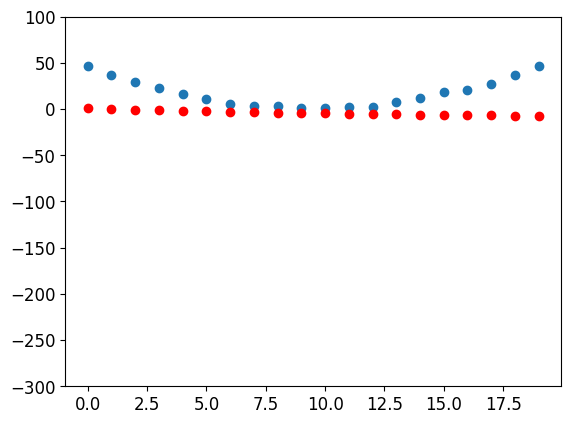

In [39]:
show_preds(preds)

**Step 3: Calculate the loss**

We calculate the loss as follows:

In [40]:
loss = mse(preds, speed)
loss

tensor(679.2726, grad_fn=<MeanBackward0>)

Our goal is now to improve this. To do that, we'll need to know the gradients

**Step 4: Calculate the gradients**

The next step is to calculate the gradients. In other words, calculate an approximation of how the parameters need to change:

In [41]:
loss.backward()
params.grad

tensor([-6668.8774,  -434.5187,   -42.9623])

In [42]:
params

tensor([ 0.0121, -0.6397,  0.6416], requires_grad=True)

**Step 5: Step the weights.**

Now we need to update the parameters based on the gradients we just calculated:

We'll need to pick a learning rate - for now we'll just use 1e-5, or 0.00001):

In [44]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None


**why do we Reset the gradients to zero for the next iteration?**

Gradients are accumulated by default in most deep learning frameworks, like PyTorch and TensorFlow. This means that when you call loss.backward() to compute gradients, the gradients are added to any existing gradients in the params.grad tensor. Resetting params.grad to None or zero prevents the accumulation of gradients from previous iterations, ensuring that you only have the gradients computed for the current iteration.



Let's see if the loss has improved:

In [45]:
preds = f(time,params)
mse(preds, speed)


tensor(358.8021, grad_fn=<MeanBackward0>)

And take a look at the plot:

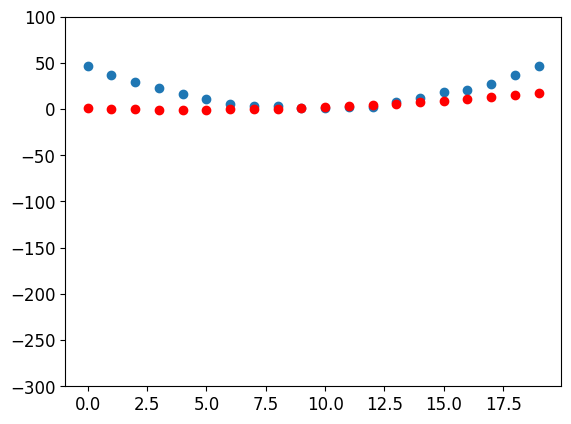

In [46]:
show_preds(preds)

We need to repeat this a few times, so we'll create a function to apply one step:

In [47]:
def apply_step(params, prn=True):
    # Calculate predictions based on the current parameters 'params' using the function 'f' (not provided in the code).
    preds = f(time, params)

    # Calculate the loss by comparing the predictions 'preds' to the target values 'speed' using the mean squared error (MSE).
    loss = mse(preds, speed)

    # Compute gradients of the loss with respect to the parameters 'params'.
    loss.backward()

    # Update the parameters using gradient descent.
    # 'lr' represents the learning rate (not provided in the code).
    params.data -= lr * params.grad.data

    # Reset the gradients to zero for the next iteration.
    params.grad = None

    # Print the value of the loss (if 'prn' is True).
    if prn:
        print(loss.item())

    # Return the predictions 'preds'.
    return preds


**Step 6: Repeat the process**

Now we iterate. By looping and performing many improvements, we hope to reach a good result:

In [48]:
for i in range(10): apply_step(params)


358.8021240234375
298.157470703125
286.67987060546875
284.50604248046875
284.09283447265625
284.0128173828125
283.9958190917969
283.9906921386719
283.9879150390625
283.98553466796875


     
The loss is going down, just as we hoped! But looking only at these loss numbers disguises the fact that each iteration represents an entirely different quadratic function being tried, on the way to finding the best possible quadratic function.

We can see this process visually if, instead of printing out the loss function, we plot the function at every step. Then we can see how the shape is approaching the best possible quadratic function for our data:



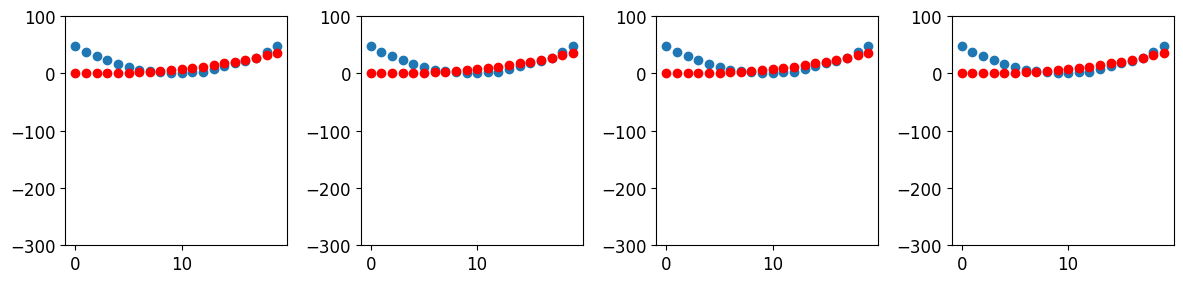

In [49]:

_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

**Step 7: stop**

We just decided to stop after 10 epochs arbitrarily. In practice, we would watch the training and validation losses and our metrics to decide when to stop, as we've discussed.



## SGD Example: MNIST Dataset

We can now try to attempt something more difficult. Check out my next article which dives into this in detail.